In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thick9/tick.jpeg
/kaggle/input/nine-digit/9.jpeg
/kaggle/input/ninejp/ninejpeg.jpeg
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
df=pd.read_csv('../input/digit-recognizer/train.csv')

In [3]:
test=pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
import matplotlib.pyplot as plt

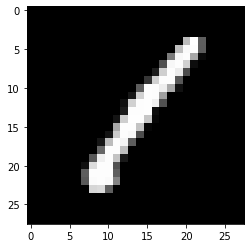

In [5]:
plt.imshow(df.drop('label',axis=1).values.reshape(42000,28,28)[0],cmap='gray')


In [6]:
df.shape

(42000, 785)

In [7]:
#y=pd.get_dummies(df['label']).values

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y=to_categorical(df['label'])


In [10]:
#df.values
y.shape

(42000, 10)

In [11]:
X=df.drop('label',axis=1).values.reshape(-1,28,28,1)

In [12]:
X=X/255


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_val,y_train,y_val=train_test_split(X,y,random_state=101,test_size=0.1)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
es=EarlyStopping(patience=25)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,BatchNormalization,Flatten,MaxPool2D

In [18]:
model=Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(5,5),padding='Same',activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())          
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(Flatten())
model.add(BatchNormalization())          
model.add(Dense(785,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())          
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff39760f290>>

In [19]:
test/=255

In [20]:
test.iloc[0]

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Name: 0, Length: 784, dtype: float64

In [21]:
import matplotlib.pyplot as plt

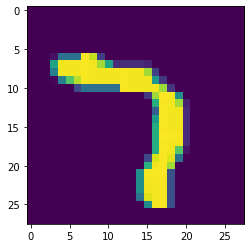

In [22]:
plt.imshow(test.iloc[[45]].values.reshape(28,28))

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
img=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,)

In [25]:
history=model.fit(img.flow(X_train,y_train,batch_size=100),epochs=50,callbacks=[es],validation_data=(X_val,y_val),batch_size=100)

Epoch 1/50
378/378 [==============================] - 20s 35ms/step - loss: 0.6477 - accuracy: 0.7977 - val_loss: 0.2035 - val_accuracy: 0.9362
Epoch 2/50
378/378 [==============================] - 13s 33ms/step - loss: 0.0917 - accuracy: 0.9732 - val_loss: 0.0803 - val_accuracy: 0.9755
Epoch 3/50
378/378 [==============================] - 12s 33ms/step - loss: 0.0751 - accuracy: 0.9778 - val_loss: 0.0414 - val_accuracy: 0.9869
Epoch 4/50
378/378 [==============================] - 13s 33ms/step - loss: 0.0573 - accuracy: 0.9826 - val_loss: 0.1013 - val_accuracy: 0.9660
Epoch 5/50
378/378 [==============================] - 12s 33ms/step - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.0420 - val_accuracy: 0.9879
Epoch 6/50
378/378 [==============================] - 12s 33ms/step - loss: 0.0502 - accuracy: 0.9856 - val_loss: 0.0338 - val_accuracy: 0.9898
Epoch 7/50
378/378 [==============================] - 12s 33ms/step - loss: 0.0453 - accuracy: 0.9874 - val_loss: 0.0348 - val_accuracy:

In [26]:
hs=pd.DataFrame(history.history)

<AxesSubplot:>

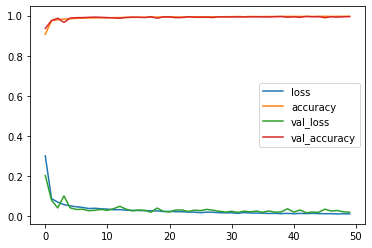

In [27]:
hs.plot()

In [28]:
from skimage import io
from skimage.transform import resize

In [29]:
data=io.imread('../input/thick9/tick.jpeg',as_gray=True)

In [30]:
nine=resize(data,(28,28))

In [31]:
model.predict_classes((1-nine).reshape(1,28,28,1))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9])

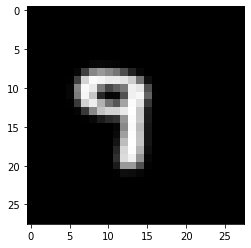

In [32]:
plt.imshow(1-nine,cmap='gray')

In [33]:
pred_val=model.predict_classes(X_val.reshape(-1,28,28,1))

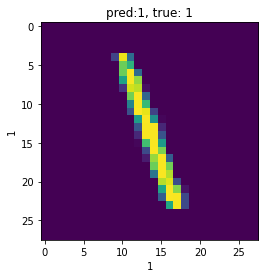

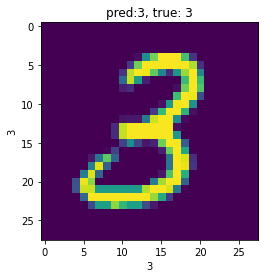

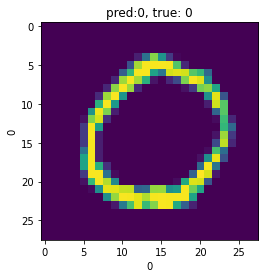

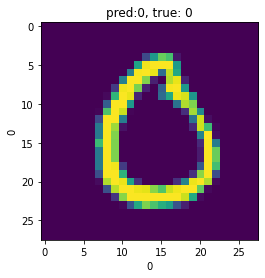

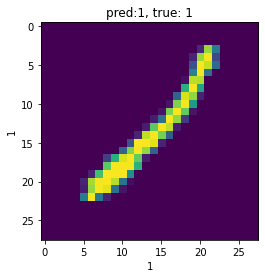

In [34]:
a=0
for i in range(len(pred_val)):
    if pred_val[i]==np.argmax(y_val[i]):
        figi=plt.figure()
        plt.imshow(X_val[i])
        plt.title(f'pred:{pred_val[i]}, true: {np.argmax(y_val[i])}')
        plt.xlabel(str(pred_val[i]))
        plt.ylabel(str(np.argmax(y_val[i])))
        if a==4:
            break
        a+=1

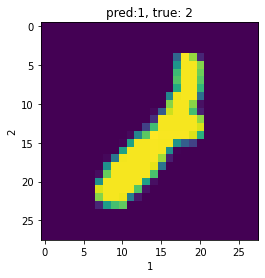

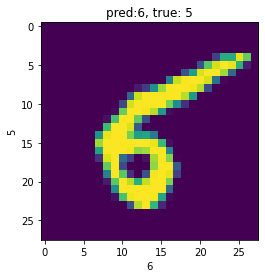

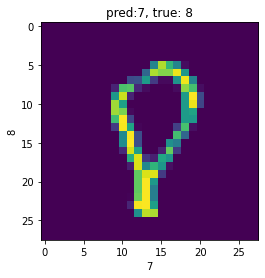

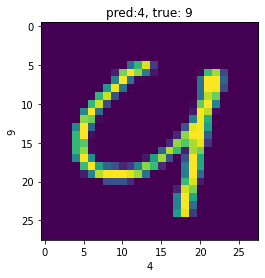

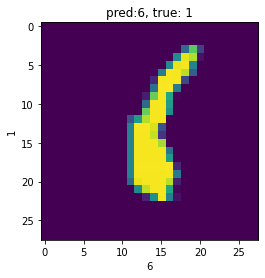

In [35]:
a=0
for i in range(len(pred_val)):
    if pred_val[i]!=np.argmax(y_val[i]):
        figi=plt.figure()
        plt.imshow(X_val[i])
        plt.title(f'pred:{pred_val[i]}, true: {np.argmax(y_val[i])}')
        plt.xlabel(str(pred_val[i]))
        plt.ylabel(str(np.argmax(y_val[i])))
        if a==4:
            break
        a+=1
    

In [36]:
output=model.predict_classes(test.values.reshape(-1,28,28,1))

In [37]:
output=pd.DataFrame({'ImageId':np.arange(1,28001),
                  'Label':output})

In [38]:
output.to_csv('mysubmission_aug.csv',index=False)